In [1]:
from pathlib import Path

def find_project_root(start: Path = Path.cwd()) -> Path:
    """Find project root by locating the 'netlists' folder in current dir or parents."""
    for p in (start, *start.parents):
        if (p / "netlists").exists():
            return p
    return start  # fallback

netlist_dir = find_project_root() / "netlists" / "examples"

pulse_path = str(netlist_dir / "pulse.net")
sin_path = str(netlist_dir / "sinusoidal.net")
chua_path = str(netlist_dir / "chua.net")
lc_path = str(netlist_dir / "lc.net")
dc_path = str(netlist_dir / "dc_source.net")
opamp_path = str(netlist_dir / "opamp_rectifier.net")
oscilator_path = str(netlist_dir / "oscilator.net")
mosfet_path = str(netlist_dir / "mosfet_curve.net")


net_out_dir = find_project_root() / "netlists" / "out"

prog_lc_path = str(net_out_dir / "programatic_lc.net")
prog_dc_path = str(net_out_dir / "programatic_dc.net")

In [2]:
from circuit_simulator import CircuitSimulator

# Netlist reading

Análise transiente detectada.


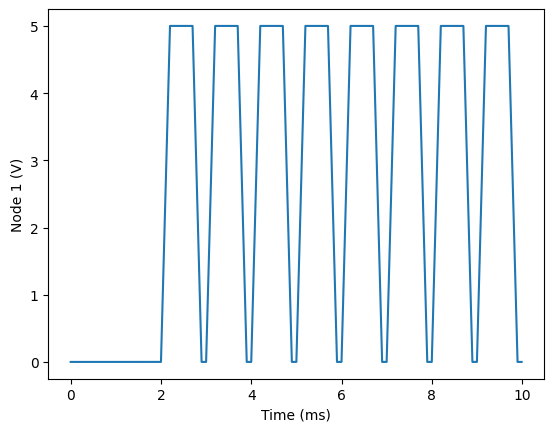

In [3]:
# PULSE
cs = CircuitSimulator(
    mode='netlist',
    netlist_path=pulse_path,
    node_plot_x1='time',
    node_plot_y1=1
)
cs.run()

Análise transiente detectada.


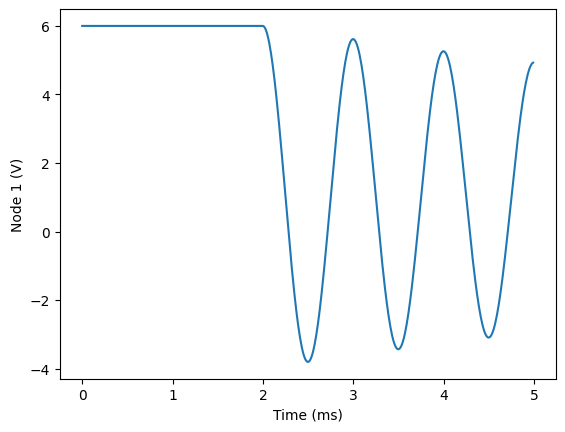

In [4]:
# SIN
cs = CircuitSimulator(
    mode='netlist',
    netlist_path=sin_path,
    node_plot_x1='time',
    node_plot_y1=1
)
cs.run()

Análise transiente detectada.


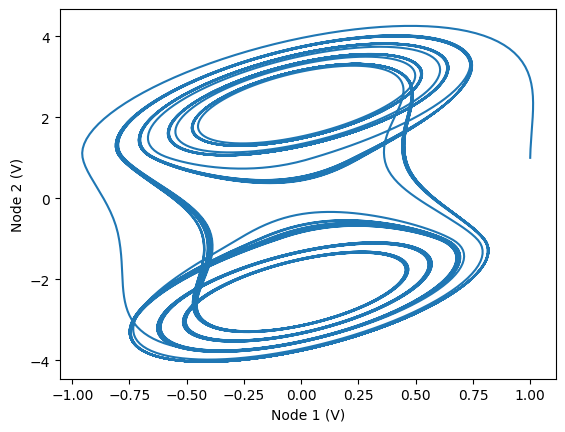

In [5]:
# CHUA
cs = CircuitSimulator(
    mode='netlist',
    netlist_path=chua_path,
    node_plot_x1=1,
    node_plot_y1=2
)
cs.run()

Análise transiente detectada.


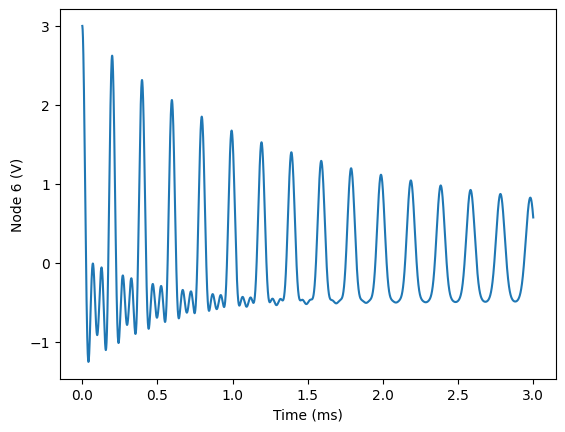

In [6]:
# LC
cs = CircuitSimulator(
    mode='netlist',
    netlist_path=lc_path,
    node_plot_x1='time',
    node_plot_y1=6
)
cs.run()

Análise transiente detectada.


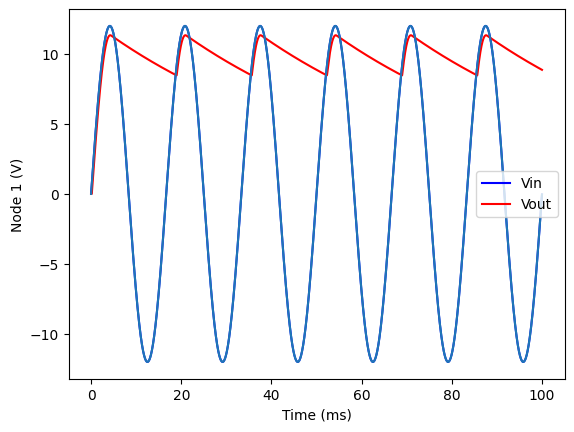

In [7]:
#dc_source
cs = CircuitSimulator(
    mode='netlist',
    netlist_path=dc_path,
    node_plot_x1='time',
    node_plot_y1=1,
    node_plot_x2='time',
    node_plot_y2=2
)
cs.run()

Análise transiente detectada.


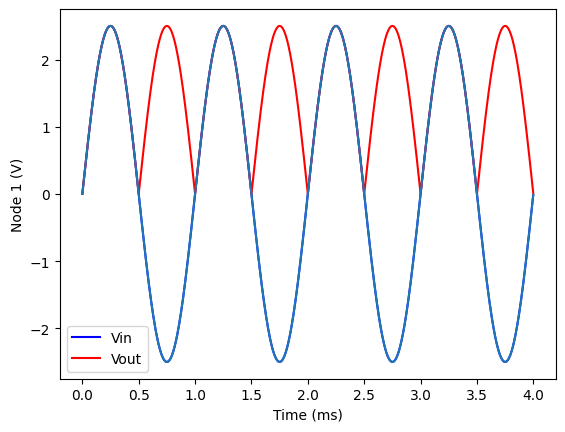

In [8]:
#OPamp_rectifier
cs = CircuitSimulator(
    mode='netlist',
    netlist_path=opamp_path,
    node_plot_x1='time',
    node_plot_y1=1,
    node_plot_x2='time',
    node_plot_y2=7
)
cs.run()

Análise transiente detectada.


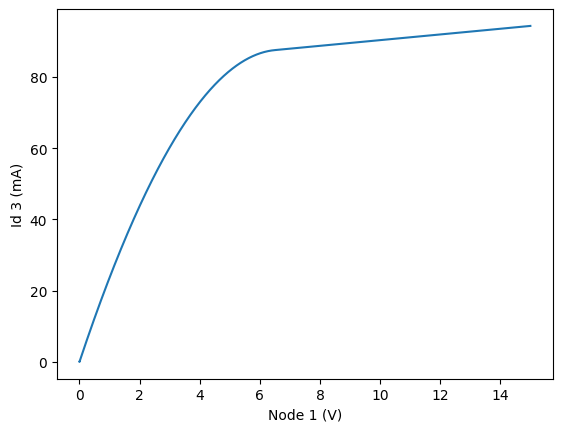

In [9]:
#Mosfet
cs = CircuitSimulator(
    mode='netlist',
    netlist_path=mosfet_path,
    node_plot_x1=1,
    node_plot_y1=3
)
cs.run()

Análise transiente detectada.


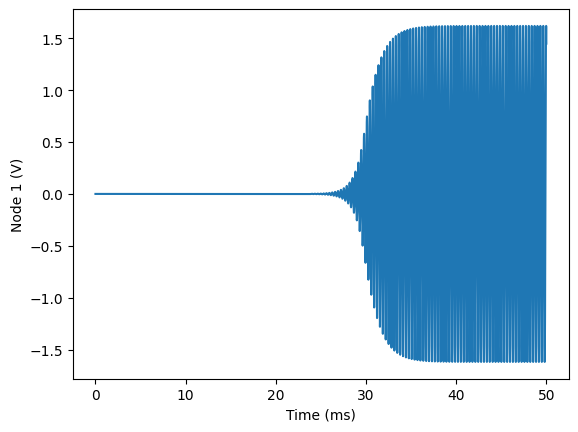

In [10]:
# Oscilator
cs = CircuitSimulator(
    mode='netlist',
    netlist_path=oscilator_path,
    node_plot_x1='time',
    node_plot_y1=1
)
cs.run()

# Programatic interface

In [11]:
from circuit_simulator.elements import (
    Inductor,
    Capacitor,
    VoltageControlledVoltageSource,

    VoltageSINSource,
    Diode,
    Resistor
)

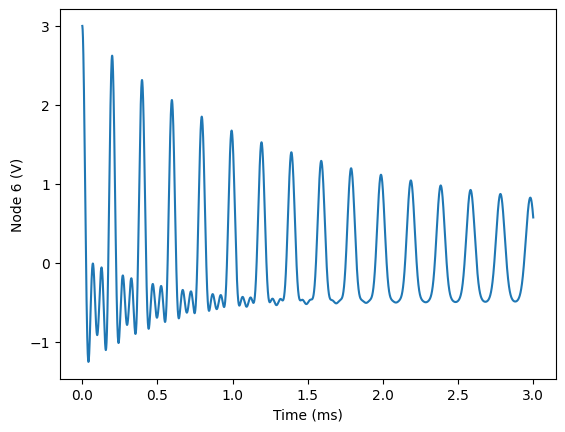

In [12]:
cs = CircuitSimulator(
        mode='programatic',
        netlist_path=prog_lc_path,
        node_plot_x1='time',
        node_plot_y1=6
    )

cs.ckt.nodes = 6

cs.ckt += Inductor("L3001", 1, 0, 0.001)
cs.ckt += Inductor("L3002", 2, 0, 0.00025)
cs.ckt += Inductor("L3003", 3, 0, 0.00011111111110000001)
cs.ckt += Capacitor("C2002", 1, 0, 1e-06, 1)
cs.ckt += Capacitor("C2003", 2, 0, 1e-06, 1)
cs.ckt += Capacitor("C2004", 3, 0, 1e-06, 1)
cs.ckt += VoltageControlledVoltageSource("E7000", 4, 0, 3, 0, 1)
cs.ckt += VoltageControlledVoltageSource("E7001", 5, 4, 2, 0, 1)
cs.ckt += VoltageControlledVoltageSource("E7002", 6, 5, 1, 0, 1)

cs.sim.config['analysis_type'] = ".TRAN"
cs.sim.config['time_simulation'] = 0.003
cs.sim.config['step_simulation'] = 3e-07
cs.sim.config['integration_method'] = "BE"
cs.sim.config['internal_steps'] = 0.5

cs.run()

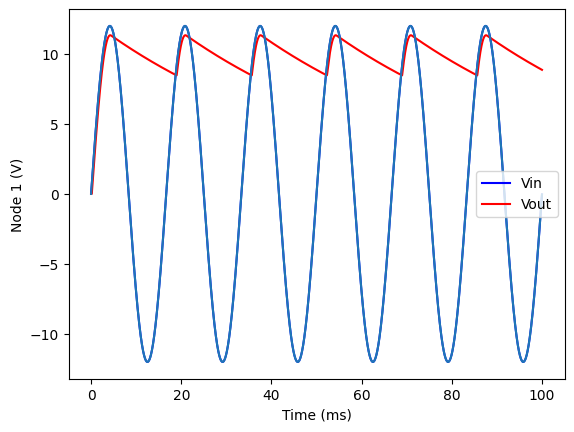

In [13]:
cs = CircuitSimulator(
    mode='programatic',
    netlist_path=prog_dc_path,
    node_plot_x1='time',
    node_plot_y1=1,
    node_plot_x2='time',
    node_plot_y2=2
)

cs.ckt.nodes = 2

cs.ckt += VoltageSINSource("V85131", 1, 0, 'SIN', 0, 12, 60, 0.0, 0, 0, 6)
cs.ckt += Diode("D1202", 1, 2)
cs.ckt += Resistor("R1002", 2, 0, 1000.0)
cs.ckt += Capacitor("C2002", 2, 0, 4.9999999999999996e-05)

cs.sim.config['analysis_type'] = ".TRAN"
cs.sim.config['time_simulation'] = 0.1
cs.sim.config['step_simulation'] = 1e-05
cs.sim.config['integration_method'] = "BE"
cs.sim.config['internal_steps'] = 1

cs.run()